## <center>**ANALYSIS ON TOP SPOTIFY SONGS 2023**</center>
![Cover](https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_CMYK_Green.png)


## **Description of Dataset**

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as **track name**, **artist(s) name**, **release date**, **Spotify playlists** and **charts**, **streaming statistics**, **Apple Music presence**, **Deezer presence**, **Shazam charts**, and various audio features.

## **Goal of the project**

In this projet, We're going to explore these Songs in order to understand and find insights. We're going to see what was the characteristics of this songs.

## **Tools used**

* **Pandas** for data manipulation.
* **Numpy** for numeric calculation.
* **Seaborn and Matplotlib** for visualization.

## **About Spotify**

**Spotify** is a popular music streaming service, offering a vast library of tracks and podcasts. Users can listen for free with ads or subscribe for an ad-free experience. It's accessible on various devices, providing convenient music enjoyment.



In [1]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Top Spotify Song url
dataset_url = 'https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023'

In [3]:
# Import opendatasets to download our dataset from kaggle
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: spaakjobrighngoma
Your Kaggle Key: ··········


100%|██████████| 47.1k/47.1k [00:00<00:00, 1.35MB/s]

The dataset has been downloaded and extracted.

In [4]:
# data directory
data_dir = '/content/top-spotify-songs-2023'

In [5]:
import os
os.listdir(data_dir)

['spotify-2023.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "analysis of top spotify songs 2023"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

In this section, we're going to handle missing value in our data.



In [10]:
# import librairies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('/content/top-spotify-songs-2023/spotify-2023.csv', encoding="utf-8", encoding_errors="ignore")

In [12]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [13]:
data.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


### Explanation of variables
* **track_name** : Nom de la chanson
* **artist(s)_name** : nom du ou des artistes de la chanson
* **artist_count** : Nombre d'artistes ayant contribué à la chanson
* **released_year** : Année de sortie de la chanson
* **released_month** : Mois de sortie de la chanson
* **released_day** : Jour du mois où la chanson est sortie
* **in_spotify_playlists** : Nombre de listes de lecture Spotify dans lesquelles la chanson est incluse
* **in_spotify_charts** : Présence et rang de la chanson dans les charts Spotify
streams : Nombre total de streams sur Spotify
* **in_apple_playlists** : Nombre de listes de lecture Apple Music dans lesquelles la chanson est incluse
* **in_apple_charts** : Présence et rang de la chanson dans les charts d'Apple Music
* **in_deezer_playlists** : Nombre de listes de lecture Deezer dans lesquelles la chanson est incluse
* **in_deezer_charts** : Présence et rang de la chanson dans les charts Deezer
* **in_shazam_charts** : Présence et rang de la chanson dans les charts Shazam
* **bpm** : battements par minute, une mesure du tempo de la chanson
* **key** : Clé de la chanson
* **mode** : Mode de la chanson (majeur ou mineur)
* **danceability_%** : Pourcentage indiquant dans quelle mesure la chanson se prête à la danse
* **valence_%** : positivité du contenu musical de la chanson
* **energy_%** : Niveau d'énergie perçu de la chanson
* **acousticness_%** : Quantité de sons acoustiques dans la chanson
* **instrumentalness_%** : Quantité de contenu instrumental dans la chanson
* **liveness_%** : Présence d'éléments de performance en direct
* **speechiness_%** : Nombre de mots prononcés dans la chanson


In [14]:
print("Number of rows :  {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))

Number of rows :  953
Number of columns : 24


In [15]:
# To get information about data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# To count distinc value in the same columns
for col in data.columns:
  print("{} --> {}".format(col, data[col].nunique()))


track_name --> 942
artist(s)_name --> 645
artist_count --> 8
released_year --> 50
released_month --> 12
released_day --> 31
in_spotify_playlists --> 879
in_spotify_charts --> 82
streams --> 949
in_apple_playlists --> 234
in_apple_charts --> 172
in_deezer_playlists --> 348
in_deezer_charts --> 34
in_shazam_charts --> 198
bpm --> 124
key --> 11
mode --> 2
danceability_% --> 72
valence_% --> 94
energy_% --> 80
acousticness_% --> 98
instrumentalness_% --> 39
liveness_% --> 68
speechiness_% --> 48


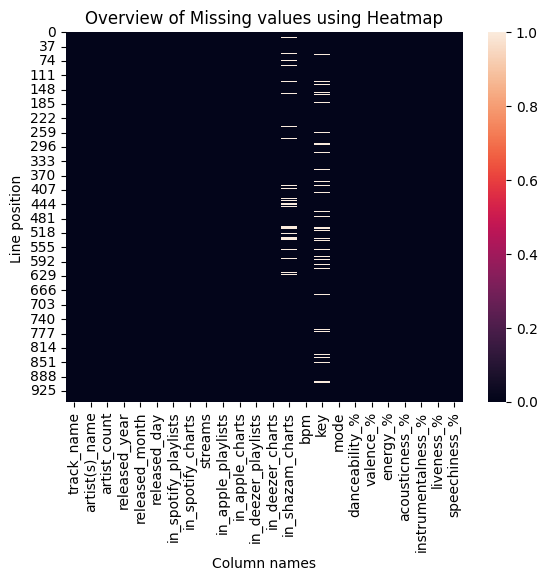

In [17]:
# A visual overview of missing values using a heatmap with the seaborn library
sns.heatmap(data.isnull())
plt.title("Overview of Missing values using Heatmap")
plt.xlabel("Column names")
plt.ylabel("Line position ")
plt.show()

**Comments :**  
  
This graph shows us that: We have two columns containing missing values. These columns are : **key**, **in_shazam_charts**.
The two columns containing missing values will not have much effect or importance for our analysis. That's why we've decided to delete these two columns.
* This is why we're going to delete these columns, as they don't add any value to our analysis.

In [18]:
# To delete some columns
data.drop(['key','in_shazam_charts'], axis=1, inplace=True)

In [22]:
# Checking Missing vaues
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [23]:
import jovian

In [24]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## **Exploratory Analysis and Visualization**

**Exploratory Analysis and Visualization** refers to the process of examining and understanding data in a visual and intuitive way. It involves using charts, graphs, and other visual tools to identify patterns, trends, and relationships within the data. This helps in gaining insights, finding outliers, and understanding the overall structure of the information at hand.

In this section, we'll try to understand our data through various visualizations and graphs.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore the shape of the distribution of our data with the skewness indicator, using the histogram and boxplot.

In [26]:
# Select String and Numerical variables
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=np.number).columns


artist_count
Skew :  3


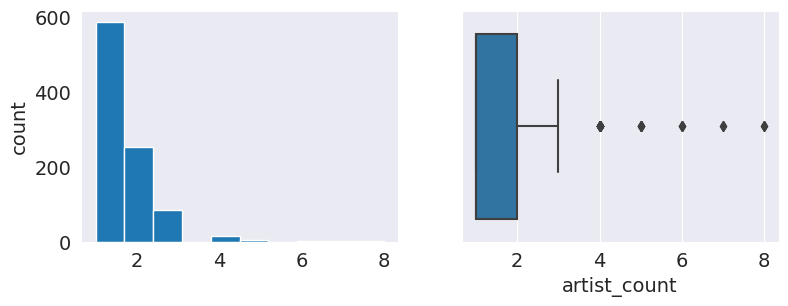

released_year
Skew :  -4


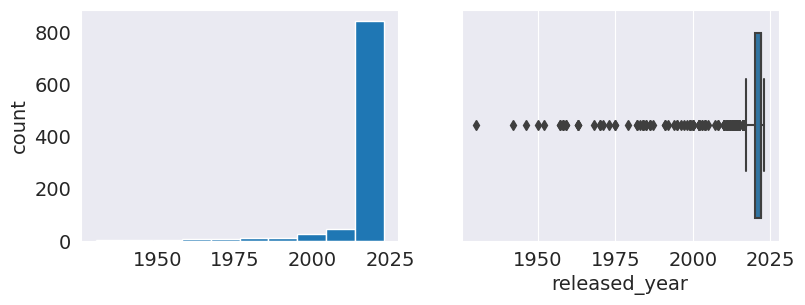

released_month
Skew :  0


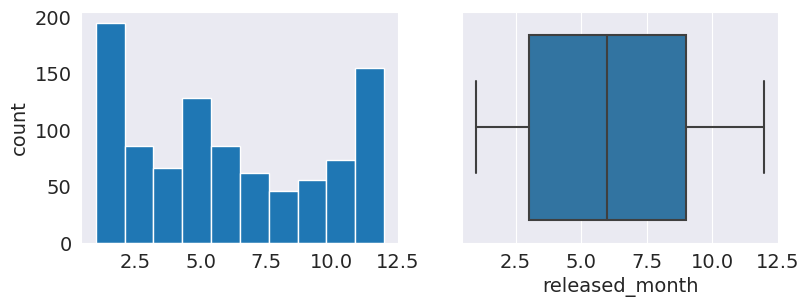

released_day
Skew :  0


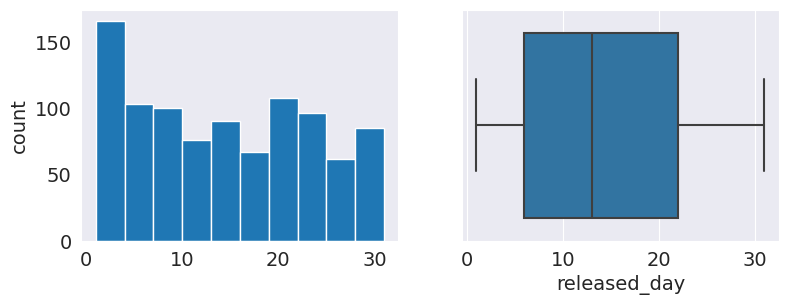

in_spotify_playlists
Skew :  3


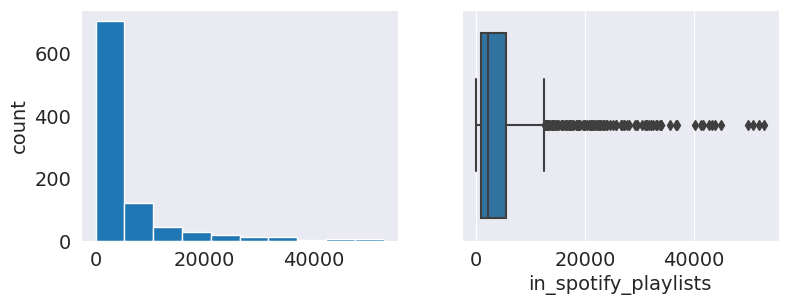

in_spotify_charts
Skew :  3


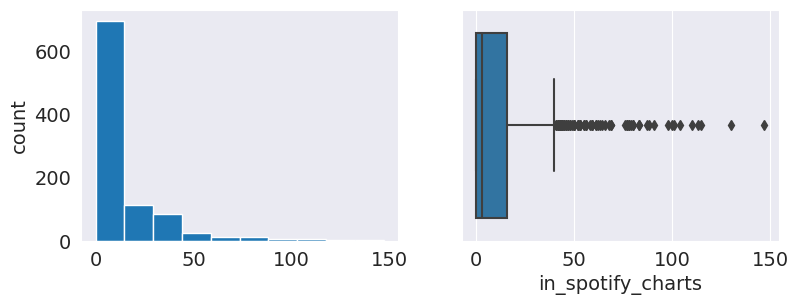

in_apple_playlists
Skew :  2


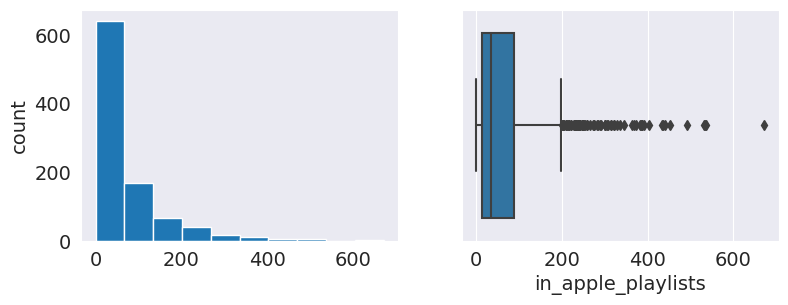

in_apple_charts
Skew :  1


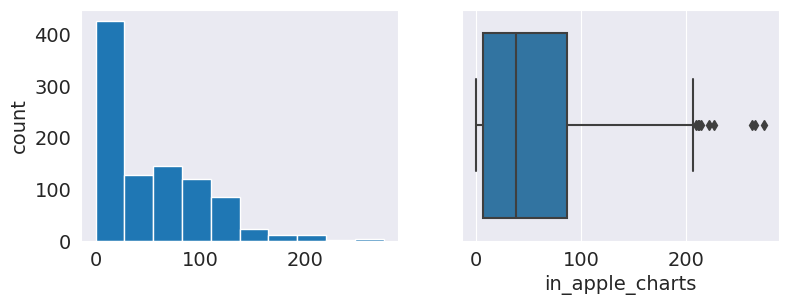

in_deezer_charts
Skew :  4


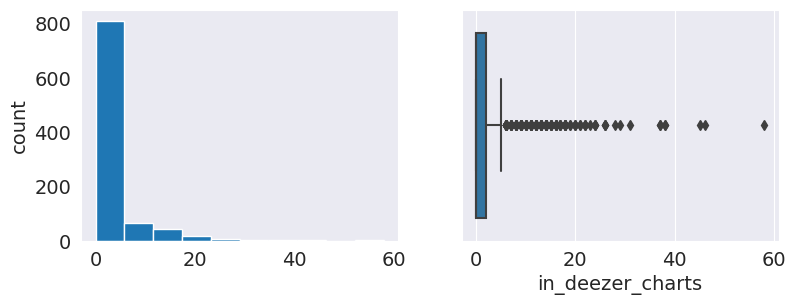

bpm
Skew :  0


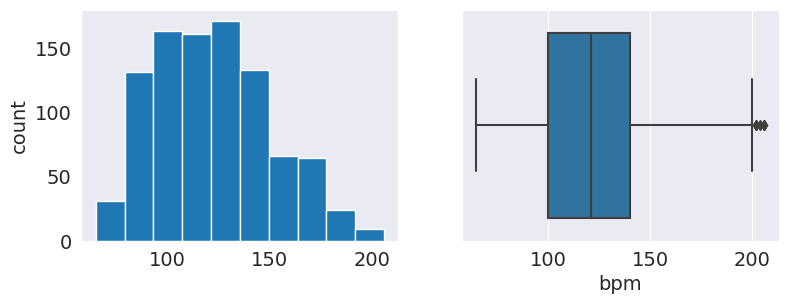

danceability_%
Skew :  0


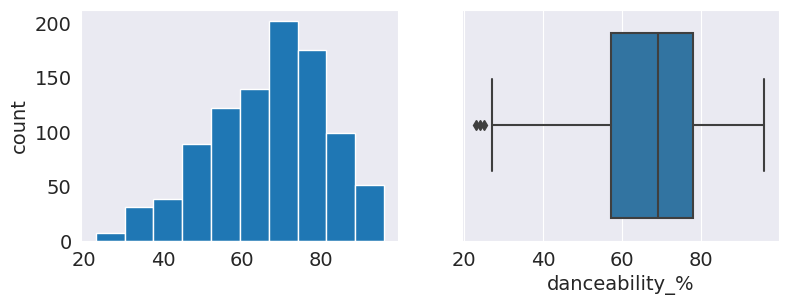

valence_%
Skew :  0


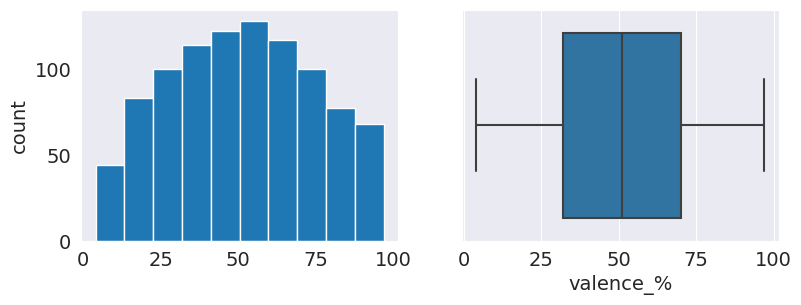

energy_%
Skew :  0


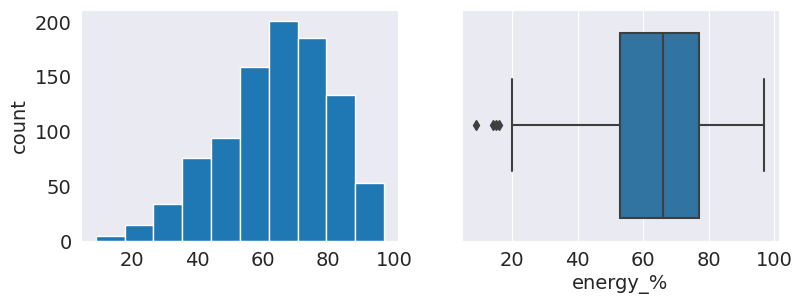

acousticness_%
Skew :  1


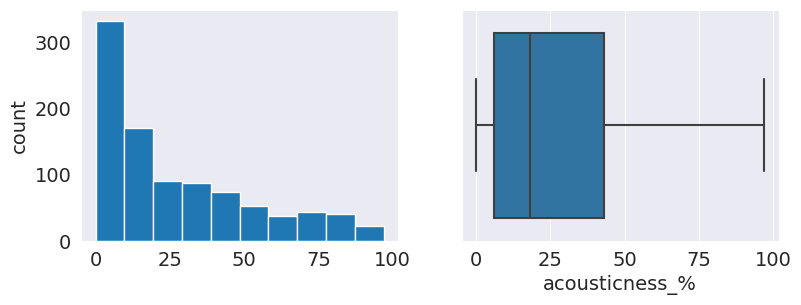

instrumentalness_%
Skew :  7


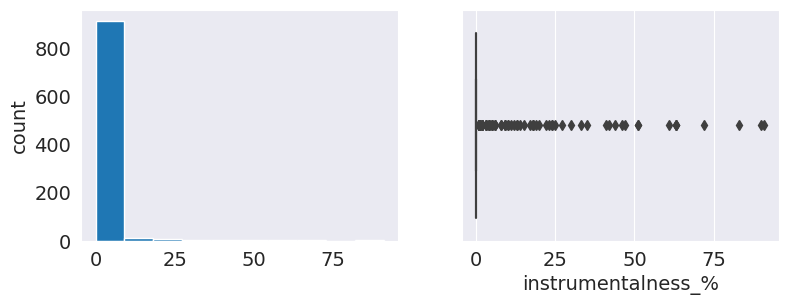

liveness_%
Skew :  2


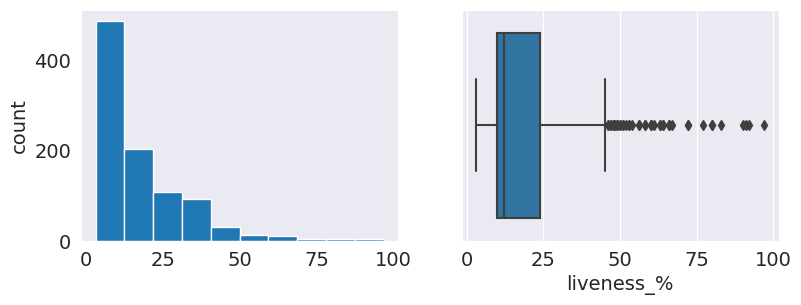

speechiness_%
Skew :  2


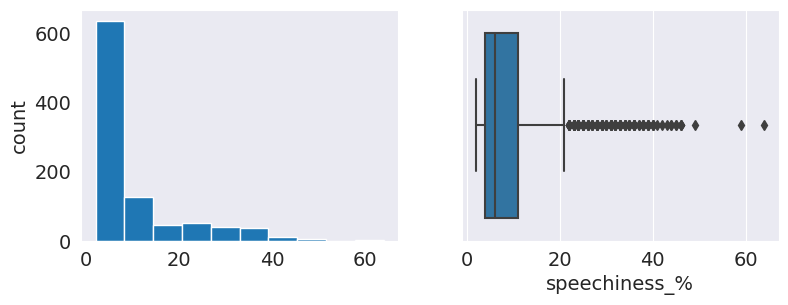

In [38]:
for col in numerical_cols:
  print(col)
  print('Skew : ', round(data[col].skew()))
  plt.figure(figsize=(9,3))
  plt.subplot(1,2,1)
  data[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

**Comments :**    

**artist_count** Skew :  3

* Le skewness de la colonne artist_count est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**released_year** Skew :  -4

* Le skewness de la colonne released_year est négatif. Cela signifie que la distribution est asymétrique. La queue gauche est plus longue et étiré. Les valeus au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**released_month** Skew :  0

* Le skewness de la colonne released_month est null. Cela signifie que la distribution est symétrique. Nous avons une distribution normale ou gaussienne.

**speechiness_%** Skew :  2

* Le skewness de la colonne artist_count est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**liveness_%** Skew :  2

* Le skewness de la colonne liveness_% est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**instrumentalness_%** Skew :  7

* Le skewness de la colonne instrumentalness_% est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**acousticness_%** Skew :  1

* Le skewness de la colonne acousticness_% est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**energy_%** Skew :  0

* Le skewness de la colonne energy_% est null. Cela signifie que la distribution est symétrique. Nous avons une distribution normale ou gaussienne.

**released_day** Skew :  0

* Le skewness de la colonne released_day est null. Cela signifie que la distribution est symétrique. Nous avons une distribution normale ou gaussienne.

**in_spotify_playlists** Skew :  3

* Le skewness de la colonne in_spotify_playlists est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**in_spotify_charts** Skew :  3

* Le skewness de la colonne in_spotify_charts est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**in_apple_playlists** Skew :  2

* Le skewness de la colonne in_apple_playlists est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**in_apple_charts** Skew :  1

* Le skewness de la colonne in_apple_charts est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**in_deezer_charts** Skew :  4

* Le skewness de la colonne in_deezer_charts est positif. Cela signifie que la distrbution est asymétrique. La queue droite (les valeurs au-dessus de la moyenne) est plus longue et étiré. Cela signifie que les valeurs au-dessous de la moyenne sont beaucoup éloigné de la moyenne.

**bpm** Skew :  0

* Le skewness de la colonne bpm est null. Cela signifie que la distribution est symétrique. Nous avons une distribution normale ou gaussienne.

**danceability_%** Skew :  0

* Le skewness de la colonne danceability_% est null. Cela signifie que la distribution est symétrique. Nous avons une distribution normale ou gaussienne.

**valence_%** Skew :  0

* Le skewness de la colonne valence_% est null. Cela signifie que la distribution est symétrique. Nous avons une distribution normale ou gaussienne.



**TODO** - Explore the artist name column and count the number of songs available to each one. We're going to take the Top 10 artists.

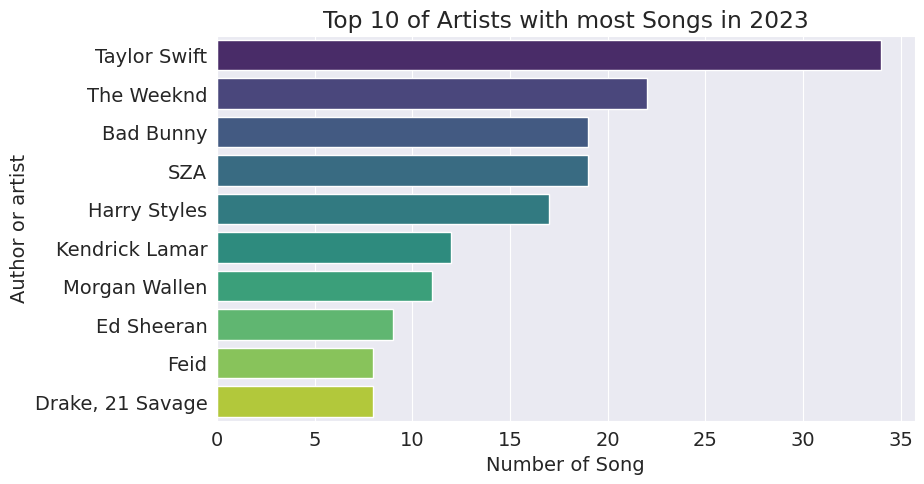

In [130]:
# Top 10 artists with most songs in the dataset
Top_10_Artists = data['artist(s)_name'].value_counts().head(10)

# plot

plt.figure(figsize=(9,5))
sns.barplot(x=Top_10_Artists.values, y=Top_10_Artists.index, palette="viridis")
plt.xlabel('Number of Song')
plt.ylabel("Author or artist")
plt.title("Top 10 of Artists with most Songs in 2023")
plt.show()


**Comments :**

According to the figure above, the 10 artists with the most songs in 2023 are :   

1. 	Taylor Swift	**(34)**
2. 	The Weeknd	**(22)**
3. 	Bad Bunny	**(19)**
4. 	SZA	**(19)**
5. 	Harry Styles	**(17)**
6. 	Kendrick Lamar	**(12)**
7. 	Morgan Wallen	**(11)**
8.	Ed Sheeran	**(9)**
9.	BTS	**(8)**
10.	Feid	**(8)**

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

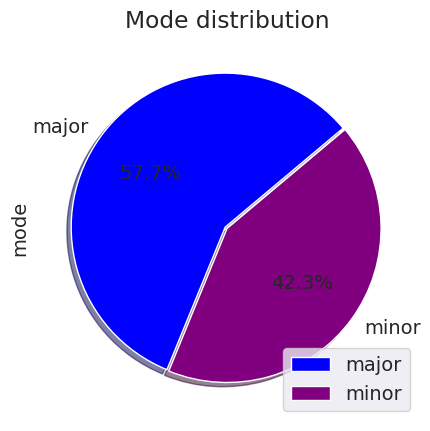

In [74]:
data['mode'].value_counts().plot.pie(autopct='%.1f%%', labels=["major", "minor"], colors=["Blue", "purple"], explode=[0.015, 0], shadow=True,startangle=40)
plt.legend()
plt.title("Mode distribution")
plt.show()

**Comments :**

The figure above shows the distribution of the Mode column. We have the distribution of songs by mode. In this sense, we have more songs in major than in minor mode.
There are :

*   **Major**: 57.7%
*   **Minor**: 42.3%"






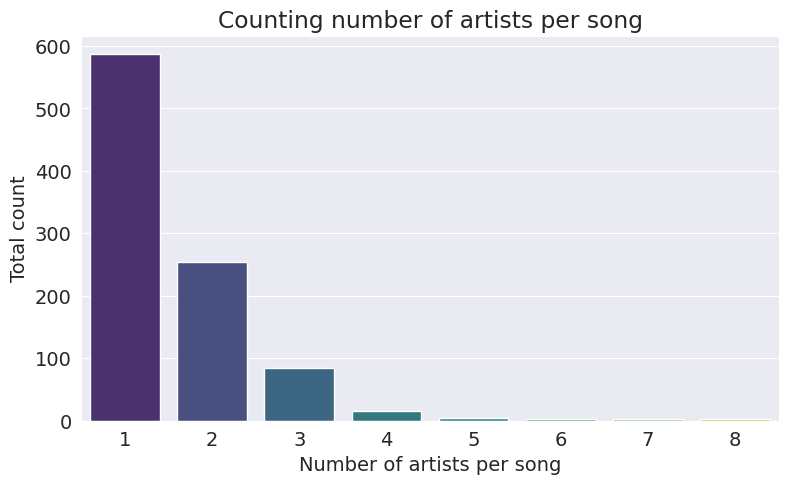

In [76]:
plt.figure(figsize=(9,5))
sns.countplot(data=data, x="artist_count", palette='viridis')
plt.title("Counting number of artists per song")
plt.xlabel("Number of artists per song")
plt.ylabel("Total count")
plt.show()

**Comments :**

This graph shows us that:
* There are more songs with only 1 artist as author. That's nearly 570 songs.
* Then there are songs with 2 artists as authors. Nearly 250 songs.
* We also have songs with 3 artists, followed by 4 and 5, i.e. 90, 20 and 5 songs respectively.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

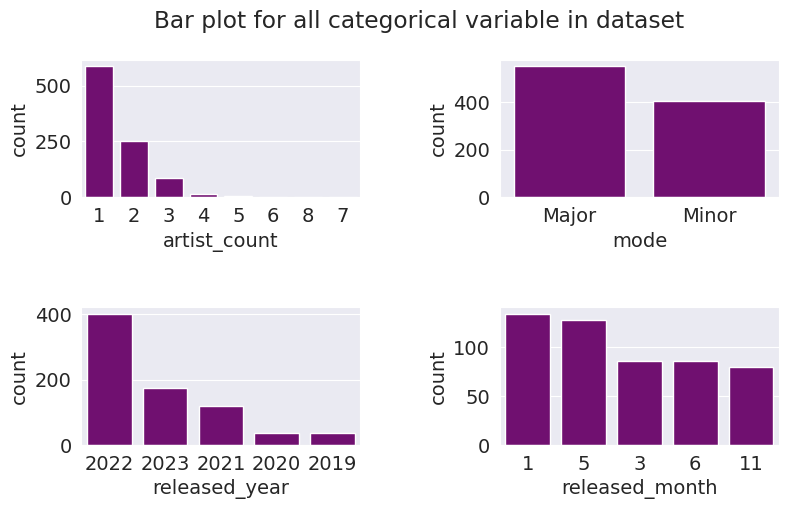

In [80]:
fig, axes = plt.subplots(2,2, figsize=(9,5))
fig.suptitle('Bar plot for all categorical variable in dataset')

sns.countplot(ax=axes[0,0], x="artist_count", data=data, order=data['artist_count'].value_counts().index, color='purple')
sns.countplot(ax=axes[0,1], x="mode", data=data, order=data['mode'].value_counts().index, color='purple')
sns.countplot(ax=axes[1,0], x="released_year", data=data, order=data['released_year'].value_counts().head(5).index, color='purple')
sns.countplot(ax=axes[1,1], x="released_month", data=data, order=data['released_month'].value_counts().head(5).index, color='purple')
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.5)


**Comments :**

These graphs count the number of instinct elements in the categorical columns.
* For the number of artists, 1,2,3 are the most numerous.
* For mode, Major dominates Minor
* For year of release, 2022 is the most dominant, followed by 2023 and 2021.
* For month, 1 and 5 are dominant.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

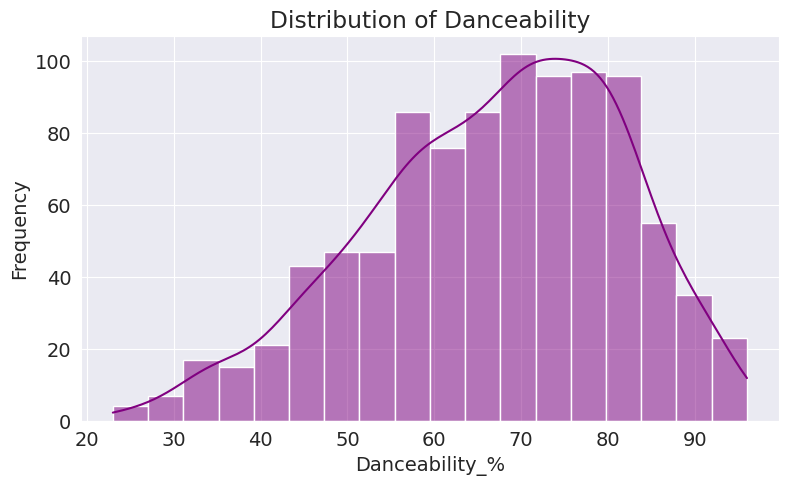

-0.4358781336949469

In [82]:
plt.figure(figsize=(9,5))
sns.histplot(data['danceability_%'], kde=True, color='purple')
plt.xlabel('Danceability_%')
plt.ylabel('Frequency')
plt.title("Distribution of Danceability")
plt.show()


data["danceability_%"].skew()

**Comments :**    

As the skewness of the danceabiblity column is negative, this means that the tail on the left is long and stretched. This simply means that values below the mean are far from the mean. Also, the distribution is slightly asymmetrical.

**TODO** - Explore one or more columns by plotting a correlation graph below, and add some explanation about it

<ipython-input-86-c86feec83ddc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_correlation.corr(), annot=True, fmt='.1f', annot_kws={'size':8},cmap='Blues', vmax=1, vmin=-1)


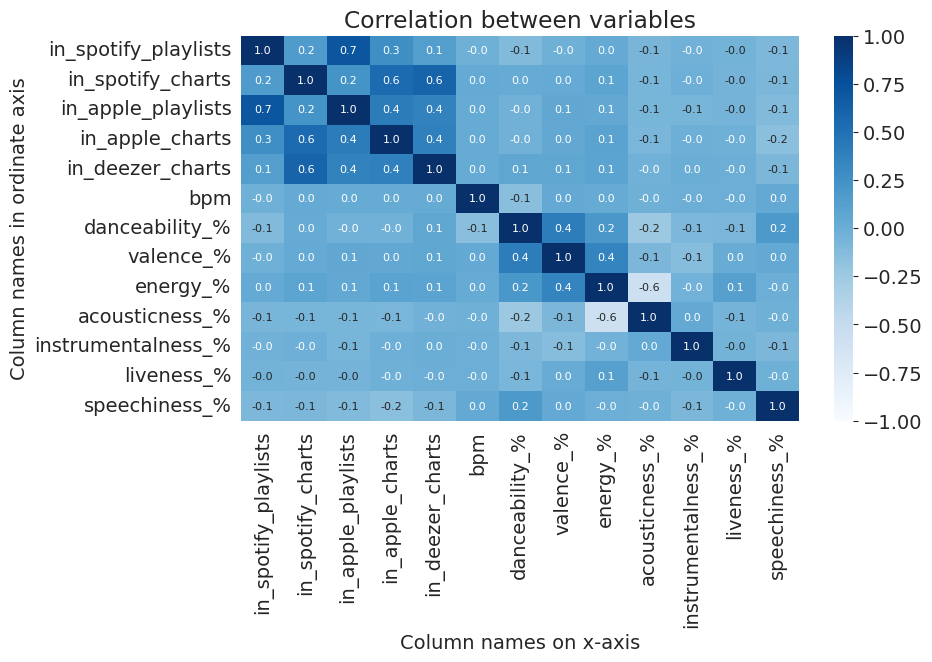

In [86]:
plt.figure(figsize=(9,5))
data_correlation = data[['in_spotify_playlists','in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts','in_deezer_playlists', 'in_deezer_charts', 'bpm', 'mode','danceability_%', 'valence_%', 'energy_%', 'acousticness_%','instrumentalness_%', 'liveness_%', 'speechiness_%']]
sns.heatmap(data_correlation.corr(), annot=True, fmt='.1f', annot_kws={'size':8},cmap='Blues', vmax=1, vmin=-1)
plt.xlabel("Column names on x-axis")
plt.ylabel("Column names in ordinate axis")
plt.title("Correlation between variables")
plt.show()

**Comments :**

From the figure above, we can conclude the following:
* There is a positive correlation between in_spotify_playlists and the following variables: in_spotify_charts, in_apple_charts, in_deezer_playlists, in_deezer_charts.

* We can also see that all playlist and chart variables are positively correlated.


Let us save and upload our work to Jovian before continuing

In [88]:
import jovian

In [89]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Asking and Answering Questions


In this section, we will ask some questions and let our data provide us with the answers to those questions.



#### Q1: - What are the top 10 songs with the most streams?

In [112]:
data = data[data['streams']!='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
data['streams'] = pd.to_numeric(data['streams'])
data2 = data[['track_name','streams']].sort_values(by='streams', ascending=False).head(10).reset_index().drop(['index'], axis=1)
data2

,track_name,streams
0,Blinding Lights,3703895074
1,Shape of You,3562543890
2,Someone You Loved,2887241814
3,Dance Monkey,2864791672
4,Sunflower - Spider-Man: Into the Spider-Verse,2808096550
5,One Dance,2713922350
6,STAY (with Justin Bieber),2665343922
7,Believer,2594040133
8,Closer,2591224264
9,Starboy,2565529693


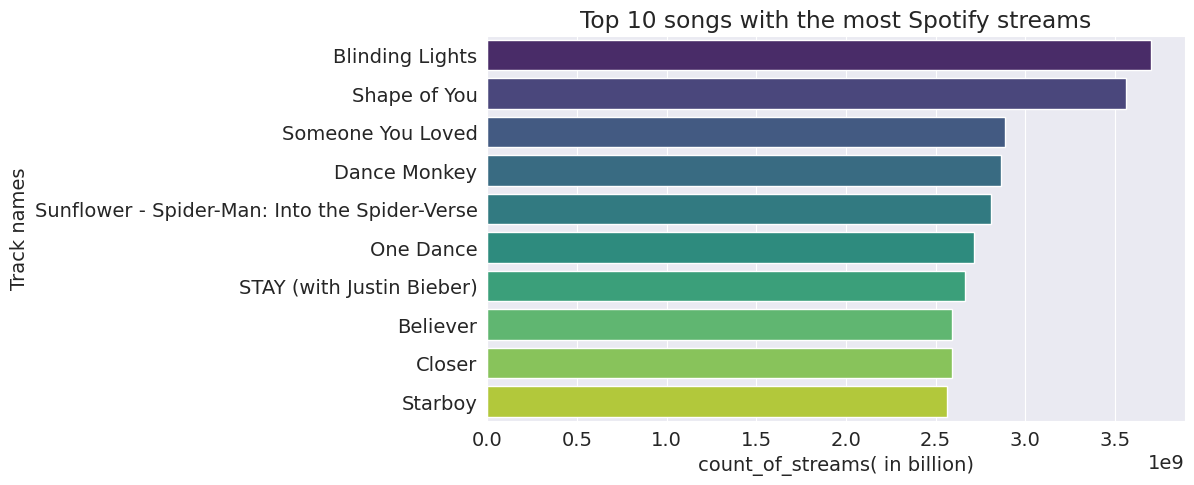

In [114]:
plt.figure(figsize=(9,5))
sns.barplot(y = data2['track_name'],x = data2['streams'], palette='viridis')
plt.ylabel('Track names')
plt.title('Top 10 songs with the most Spotify streams')
plt.xlabel('count_of_streams( in billion)')
plt.show()


**Comments :**

The five songs with the most streams on the Spotify platform in 2023 are the following:     
1.  **Blinding Lights** (3.5 billions)
2.  **Shape of You** (3.2 billions)
3.  **Soone You Loved** (2.9 billions)
4.  **Dance Monkey** (2.8 billions)
5.  **Sunflower - Spider-Man: Into the Spider-Verser** (2.7 billions)
6. **One Dance** (2.75 billions)
7. **STAY** (with Justin Bieber) (2.6 billions)
8. **Believer** (2.6 billions)
9. **Closer** (2.6 billions)
10. **Starboy** (2.6 billions)


#### Q2: - How many minor and major songs do we have? ?

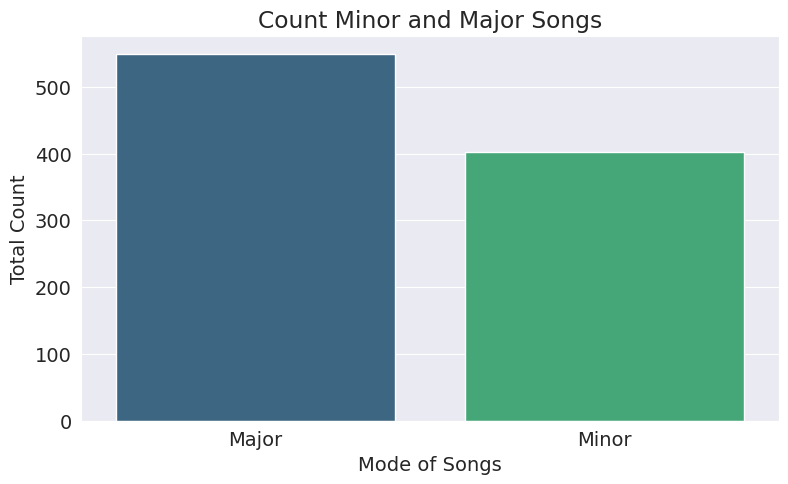

In [99]:
plt.figure(figsize=(9,5))
g = sns.countplot(data=data, x ='mode', palette='viridis' )
plt.title("Count Minor and Major Songs")
plt.xlabel("Mode of Songs")
plt.ylabel("Total Count")
plt.show()

**Comments :**

According to the figure above, there are more songs in the Major mode than in the Minor.

#### Q3:- What is the trend of content each year ?

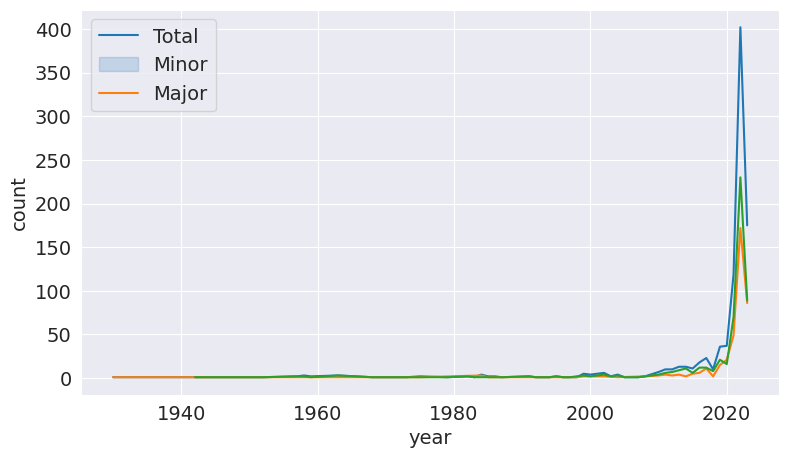

In [107]:
# Number of content items added each year
numberOfSongAddedEachYear = data['released_year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','released_year':'count'})

# Create a dataframe with two columns (released_year) and (mode)
dataAllMode = data[['released_year','mode']]

# Dataframe containing song data of type = Minor added each year
Minor = dataAllMode[dataAllMode['mode']=='Minor']['released_year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','released_year':'count'})

# Dataframe containing data on = Major songs added each year
Major = dataAllMode[dataAllMode['mode']=='Major']['released_year'].value_counts().to_frame().reset_index().rename(columns={'index':'year','released_year':'count'})

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
g = sns.lineplot(data=numberOfSongAddedEachYear, x='year', y='count')
g = sns.lineplot(data=Minor, x='year', y='count')
g = sns.lineplot(data=Major, x='year', y='count')
plt.legend(['Total','Minor','Major'])
plt.show()

**Comments :**  

According to the figure above, most of the content (songs) was added in 2008 and 2009. Also we notice that most of the content was major songs.
However, minor content saw its peak in 2020. For they have slightly surpassed major content.

In relation to this trend, we can notice that the Spotify platform became increasingly famous in the 2010s, as there was more and more content being added to the platform.

#### Q4:- What is the trend of danceability in Songs overs the year ?

<ipython-input-110-131883c9c718>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=average_danceability_by_year.index, y=average_danceability_by_year.values, palette='viridis', color='blue')


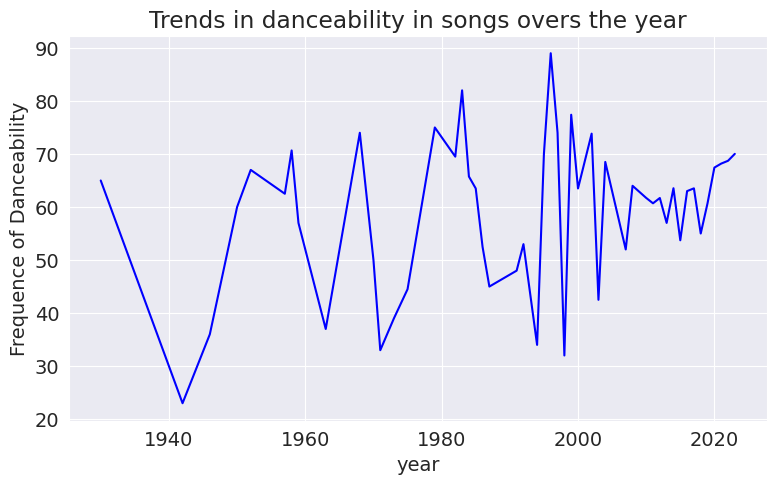

In [110]:
# Group average danceability by year
average_danceability_by_year = data.groupby('released_year')['danceability_%'].mean()

# Plotting
plt.figure(figsize=(9,5))
sns.lineplot(x=average_danceability_by_year.index, y=average_danceability_by_year.values, palette='viridis', color='blue')
plt.xlabel('year')
plt.ylabel('Frequence of Danceability')
plt.title("Trends in danceability in songs overs the year")
plt.show()

**Comments :**  

D'après cette courbe, nous pouvons constater que :    
* Avant 1940, les chansons avaient un pourcentage de danse très élévé. Cependant,il y a eu une chute drastique de cette mesure dans les chansons
* Dans les années 1950, les chansons ont augmenté leur mesure mesure de se prête à la danse. Cela a encore chuté dans les années 1960.
* Dans les années 1990, nous avons connu une période où les chanson se prêtaient à la danse comme jamais auparavant avec un pourcentage de 90%.
* Ensuite, cela a chuté doucement doucement jusqu'en 2020.
* Actuellement, nous sommes dans une civilisation où la jeunesse se livre de plus en plus à la dance. C'est assurement dans ce sens que le graphe semble s'accroite à partir des années 2021....

#### Q5:- Content added to the Spotify platform every month of the year?

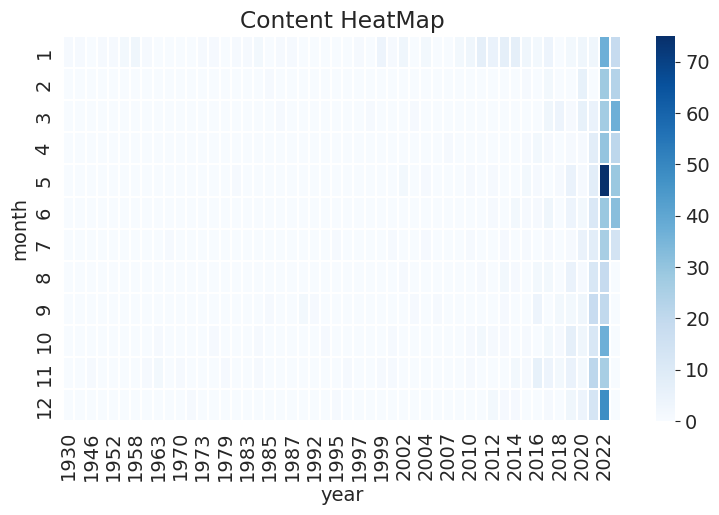

In [111]:
contentAddByMonth = data.groupby('released_year')['released_month'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(9,5))
g = sns.heatmap(contentAddByMonth, linewidths=0.025, cmap='Blues')
plt.title('Content HeatMap')
plt.ylabel('month')
plt.xlabel('year')
plt.show()

**Comments :**   

We can see that from 2021 onwards, the amount of content on the Spotify platform started to increase significantly! Just from this, we can understand that the platform was becoming increasingly popular and in demand.

#### Q6:- The 10 most popular tracks in Apple Music playlists?

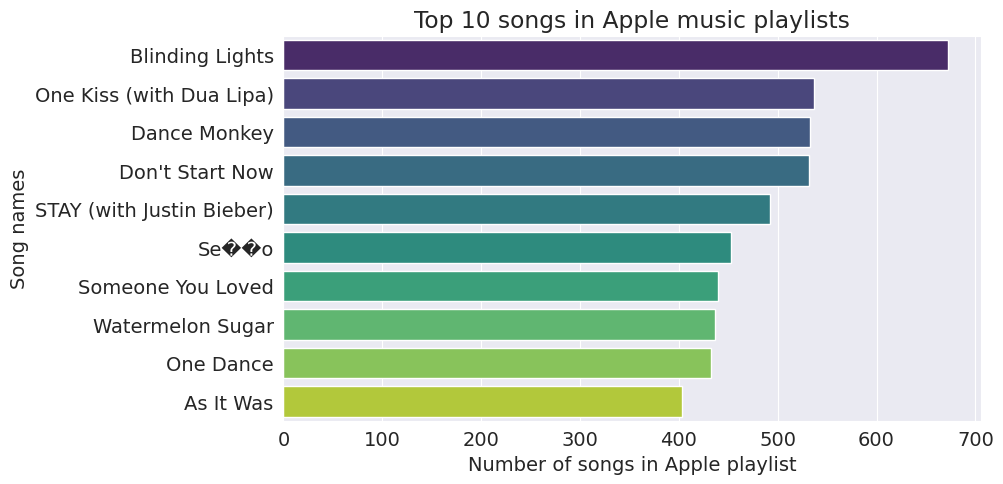

In [129]:
top_10_Song_Apple = data[['artist(s)_name','track_name','in_apple_playlists']].sort_values(by='in_apple_playlists', ascending=False).head(10)

plt.figure(figsize=(9,5))
sns.barplot(x=top_10_Song_Apple['in_apple_playlists'], y=top_10_Song_Apple['track_name'], palette='viridis')
plt.xlabel('Number of songs in Apple playlist')
plt.ylabel('Song names')
plt.title('Top 10 songs in Apple music playlists')
plt.show()


**Comments :**   

The graph above shows the 10 Spotify songs with the highest level of presence on the Apple platform.

1. Blinding Lights --->	**672**
2. One Kiss (with Dua Lipa) --->	**537**
3. Dance Monkey --->	**533**
4. Don't Start Now --->	**532**
5. STAY (with Justin Bieber) --->	**492**
6. Se��o --->	**453**
7. Someone You Loved --->	**440**
8. Watermelon Sugar --->	**437**
9. One Dance --->	**433**
10. As It Was --->	**403**

In [131]:
import jovian

In [132]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Inferences and Conclusion

What I've noticed is that most of the content has been added quite recently to the platform. Starting from 2010, the content on the platform began to increase significantly! This justifies the platform's popularity in the year 2022.




In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## References and Future Work

* Predict the number of streaming according to all features of each Song.
* See the characteristics of the Best Songs and help producers and artists improve their positioning on the platform.
* To develop a regression algorithm capable of predicting the number of streams a song can achieve in relation to its characteristics. We'll build our algorithm and let it learn the different characteristics of its best 2023 songs, so that it can predict the number of streams a song can achieve in relation to its characteristics.

Somes ressources :

* https://jovian.com/allenkong221/netflix-movies-and-tv-shows-project
* https://chat.openai.com/c/cb634362-e38b-4a02-a1a1-ea8dd6ec7bbe


In [133]:
import jovian

In [134]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
